# Project - Human Activity Recognition using Smartphones

### This is a continuation of the above project where we have already performed the comparative analysis of multiple classifier models like Logisti Regression, Linear SVC, etc.
### Now we are going to use Artificial Neural Network(ANN) approach to train our model and perform predictions

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Loading datsets

In [2]:
train_df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Human Activity Recognition using Smartphones\Dataset/cleaned_train.csv')
test_df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Human Activity Recognition using Smartphones\Dataset/cleaned_test.csv')

In [3]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAccmeanX,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAccmeanY,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAccmeanZ,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAccstdX,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAccstdY,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angleXgravityMean,-0.841247,-0.844788,-0.848933,-0.848649,-0.847865,-0.849632,-0.85215,-0.851017,-0.847971,-0.848294,...,-0.830575,-0.799426,-0.787935,-0.780362,-0.797272,-0.791883,-0.77184,-0.779133,-0.785181,-0.783267
angleYgravityMean,0.179941,0.180289,0.180637,0.181935,0.185151,0.184823,0.18217,0.183779,0.188982,0.19031,...,0.213174,0.23549,0.24449,0.249624,0.234996,0.238604,0.252676,0.249145,0.246432,0.246809
angleZgravityMean,-0.0586269,-0.0543167,-0.0491178,-0.0476632,-0.0438923,-0.0421264,-0.04301,-0.0419758,-0.0373639,-0.0344173,...,-0.00510524,-0.00164732,0.00953791,0.0278779,0.048907,0.0498191,0.0500526,0.0408112,0.0253395,0.0366948
subject,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30


### Pre-processing and data preparation to feed data into Artificial Neural Network.

#### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df.iloc[:,0:562])
mat_train = scaler.transform(train_df.iloc[:,0:562])
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [5]:
scaler = MinMaxScaler()
scaler.fit(test_df.iloc[:,0:562])
mat_test = scaler.transform(test_df.iloc[:,0:562])
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [6]:
temp = []
for i in train_df.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
train_df["n_Activity"] = temp

In [7]:
temp = []
for i in test_df.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test_df["n_Activity"] = temp

In [8]:
train_df.drop(["Activity"] , axis = 1 , inplace = True)

In [9]:
test_df.drop(["Activity"] , axis = 1 , inplace = True)

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(train_df.n_Activity , num_classes=6)
y_test = to_categorical(test_df.n_Activity , num_classes=6)

In [11]:
X_train = mat_train 
X_test = mat_test

In [12]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


### Using Principle Component Analysis(PCA) approach for Dimensionality Reduction

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [14]:
explained_variance

array([6.15828106e-01, 5.06400451e-02, 4.26434706e-02, 1.86262004e-02,
       1.66035347e-02, 1.24953315e-02, 1.16965425e-02, 1.08678969e-02,
       9.83433293e-03, 8.50657174e-03, 8.37001183e-03, 7.05127957e-03,
       6.70338404e-03, 5.99328732e-03, 5.41181394e-03, 4.88930458e-03,
       4.73761525e-03, 4.55982869e-03, 4.23964053e-03, 4.11226497e-03,
       4.09249242e-03, 3.86897287e-03, 3.70602160e-03, 3.53225460e-03,
       3.41733672e-03, 3.24938911e-03, 3.10949303e-03, 3.04379473e-03,
       2.98265122e-03, 2.88530149e-03, 2.80394457e-03, 2.70513498e-03,
       2.62673924e-03, 2.56092694e-03, 2.38739329e-03, 2.37354154e-03,
       2.25141457e-03, 2.17735852e-03, 2.08401681e-03, 2.06161176e-03,
       2.03456493e-03, 1.96339691e-03, 1.91427414e-03, 1.81388346e-03,
       1.77166464e-03, 1.70712611e-03, 1.67952873e-03, 1.61571929e-03,
       1.58378870e-03, 1.55410378e-03, 1.50763285e-03, 1.44365153e-03,
       1.40415069e-03, 1.36628463e-03, 1.32540485e-03, 1.27087175e-03,
      

### Building the ANN Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [16]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                36032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                36032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,batch_size=12,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
613/613 [==============================] - 4s 4ms/step - loss: 0.4755 - accuracy: 0.8251 - val_loss: 0.2572 - val_accuracy: 0.9019
Epoch 2/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0637 - accuracy: 0.9775 - val_loss: 0.3979 - val_accuracy: 0.8799
Epoch 3/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 0.5281 - val_accuracy: 0.8694
Epoch 4/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.6340 - val_accuracy: 0.8456
Epoch 5/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.3788 - val_accuracy: 0.8846
Epoch 6/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.8076 - val_accuracy: 0.8191
Epoch 7/50
613/613 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.6138 - val_accuracy: 0.8616
Epoch 

In [20]:
from pylab import rcParams
import matplotlib.pyplot as plt

In [21]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

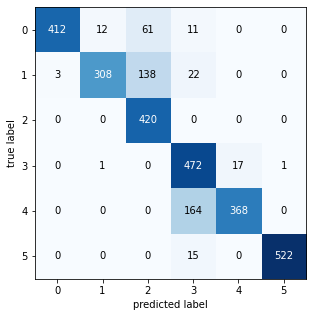

In [22]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [23]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       496
           1       0.96      0.65      0.78       471
           2       0.68      1.00      0.81       420
           3       0.69      0.96      0.80       491
           4       0.96      0.69      0.80       532
           5       1.00      0.97      0.98       537

    accuracy                           0.85      2947
   macro avg       0.88      0.85      0.85      2947
weighted avg       0.89      0.85      0.85      2947



### Saving the model

In [24]:
model.save(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Human Activity Recognition using Smartphones\Model/activity_recognizer.model')

INFO:tensorflow:Assets written to: C:\Users\KIIT\Documents\LGM-Soc contributions\Human Activity Recognition using Smartphones\Model/activity_recognizer.model\assets


In [25]:
d = { "Index":np.arange(2947) , "Activity":pred }
final = pd.DataFrame(d)
final.to_csv( 'ann_predictions.csv' , index = False)